In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# import tensorflow
# from tensorflow import keras
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
train_hist = xmr.history(period='10y')
test_hist = train_hist.copy()
train_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,112.531998,123.404999,112.219002,120.779999,86864600,0.0,0.0
2017-11-10 00:00:00+00:00,121.344002,121.665001,101.757004,105.585999,84614000,0.0,0.0
2017-11-11 00:00:00+00:00,105.750000,127.106003,103.877998,119.615997,107708000,0.0,0.0
2017-11-12 00:00:00+00:00,119.597000,133.675003,110.617996,123.856003,144948000,0.0,0.0
2017-11-13 00:00:00+00:00,128.960007,136.528000,120.921997,123.402000,116200000,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-14 00:00:00+00:00,153.583801,154.282990,151.850967,152.833160,33344438,0.0,0.0
2023-10-15 00:00:00+00:00,152.833466,153.465881,152.173126,152.448990,31895675,0.0,0.0
2023-10-16 00:00:00+00:00,152.437531,153.522949,151.155411,152.544098,64382308,0.0,0.0


In [ ]:
train_hist.iloc[2159]

Open            1.552195e+02
High            1.564820e+02
Low             1.537633e+02
Close           1.561912e+02
Volume          5.985898e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2023-10-08 00:00:00+00:00, dtype: float64

In [ ]:
train_start = [2017,11,9]
train_stop = [2023,9,7]
test_start = [2023,9,8]
test_stop=[2023,10,7]

In [ ]:
XMR = yf.download('XMR-USD', start="2017-11-09", end="2023-09-07")
XMR

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-09-02,140.821213,141.628159,139.265793,140.077774,140.077774,51308059
2023-09-03,140.088516,141.391968,139.297470,140.839981,140.839981,49564266
2023-09-04,140.842804,143.770203,140.776291,141.170868,141.170868,63835398


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
GET BTC
</i></font></p>

In [ ]:
start_date = '2017-11-09'
end_date = '2023-09-07'

# Get the Bitcoin price data
btc_price = yf.download('BTC-USD', start=start_date, end=end_date)
for col in btc_price.columns:
    btc_price.rename(columns={col : col + " - BTC"}, inplace=True)

btc_price

[*********************100%%**********************]  1 of 1 completed


,Open - BTC,High - BTC,Low - BTC,Close - BTC,Adj Close - BTC,Volume - BTC
Date,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920
...,...,...,...,...,...,...
2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473
2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
GET ETH
</i></font></p>

In [ ]:
start_date = '2017-11-09'
end_date = '2023-09-07'

# Get the Etherium price data
eth_price = yf.download('ETH-USD', start=start_date, end=end_date)
for col in eth_price.columns:
    eth_price.rename(columns={col : col + " - ETH"}, inplace=True)


eth_price

[*********************100%%**********************]  1 of 1 completed


,Open - ETH,High - ETH,Low - ETH,Close - ETH,Adj Close - ETH,Volume - ETH
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-09-02,1628.559692,1644.030640,1627.976074,1637.025391,1637.025391,2943590996
2023-09-03,1637.043579,1645.645142,1626.089233,1636.117676,1636.117676,3151878318
2023-09-04,1635.724731,1642.653198,1618.523682,1629.655273,1629.655273,3887968912


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
GET BNB
</i></font></p>

In [ ]:
start_date = '2017-11-09'
end_date = '2023-09-07'

# Get the Binance price data
bnb_price = yf.download('BNB-USD', start=start_date, end=end_date)
for col in bnb_price.columns:
    bnb_price.rename(columns={col : col + " - BNB"}, inplace=True)

bnb_price

[*********************100%%**********************]  1 of 1 completed


,Open - BNB,High - BNB,Low - BNB,Close - BNB,Adj Close - BNB,Volume - BNB
Date,,,,,,
2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200
2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000
2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150
2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700
2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800
...,...,...,...,...,...,...
2023-09-02,213.626923,215.599503,213.290543,214.448547,214.448547,291979876
2023-09-03,214.454819,215.114899,213.411957,214.399948,214.399948,264565518
2023-09-04,214.393112,216.267517,213.282379,215.197510,215.197510,364530693


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Merge the DFs
</i></font></p>

In [ ]:
coins_prices_df = pd.merge(btc_price, eth_price, on="Date")
coins_prices_df = pd.merge(coins_prices_df, bnb_price, on="Date")

coins_prices_df

,Open - BTC,High - BTC,Low - BTC,Close - BTC,Adj Close - BTC,Volume - BTC,Open - ETH,High - ETH,Low - ETH,Close - ETH,Adj Close - ETH,Volume - ETH,Open - BNB,High - BNB,Low - BNB,Close - BNB,Adj Close - BNB,Volume - BNB
Date,,,,,,,,,,,,,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,2.053140,2.174230,1.893940,1.990770,1.990770,19192200
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,2.007730,2.069470,1.644780,1.796840,1.796840,11155000
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,1.786280,1.917750,1.614290,1.670470,1.670470,8178150
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,1.668890,1.672800,1.462560,1.519690,1.519690,15298700
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,1.526010,1.735020,1.517600,1.686620,1.686620,12238800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473,1628.559692,1644.030640,1627.976074,1637.025391,1637.025391,2943590996,213.626923,215.599503,213.290543,214.448547,214.448547,291979876
2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523,1637.043579,1645.645142,1626.089233,1636.117676,1636.117676,3151878318,214.454819,215.114899,213.411957,214.399948,214.399948,264565518
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106,1635.724731,1642.653198,1618.523682,1629.655273,1629.655273,3887968912,214.393112,216.267517,213.282379,215.197510,215.197510,364530693


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Make Elements DataFrame
</i></font></p>

In [ ]:
start_date = '2017-11-09'
end_date = '2023-09-07'



gold = yf.download('GC=F', start=start_date, end=end_date)
for col in gold.columns:
    gold.rename(columns={col : col + " - Gold"}, inplace=True)

silver = yf.download('SI=F', start=start_date, end=end_date)
for col in silver.columns:
    silver.rename(columns={col : col + " - Silver"}, inplace=True)

copper = yf.download('HG=F', start=start_date, end=end_date)
for col in copper.columns:
    copper.rename(columns={col : col + " - Copper"}, inplace=True)


elements_prices_df = pd.merge(gold, silver, on="Date")
elements_prices_df = pd.merge(elements_prices_df, copper, on="Date")

elements_prices_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open - Gold,High - Gold,Low - Gold,Close - Gold,Adj Close - Gold,Volume - Gold,Open - Silver,High - Silver,Low - Silver,Close - Silver,Adj Close - Silver,Volume - Silver,Open - Copper,High - Copper,Low - Copper,Close - Copper,Adj Close - Copper,Volume - Copper
Date,,,,,,,,,,,,,,,,,,
2017-11-09,1279.699951,1286.900024,1279.699951,1285.599976,1285.599976,18,16.930000,16.943001,16.930000,16.943001,16.943001,2,3.0775,3.0855,3.0770,3.0800,3.0800,222
2017-11-10,1283.500000,1283.500000,1272.400024,1272.400024,1272.400024,10,17.000000,17.000000,16.844000,16.844000,16.844000,1,3.0790,3.0790,3.0635,3.0695,3.0695,214
2017-11-13,1277.300049,1277.300049,1277.000000,1277.300049,1277.300049,3,16.840000,17.023001,16.840000,17.023001,17.023001,3,3.0860,3.1260,3.0860,3.1115,3.1115,368
2017-11-14,1276.900024,1281.500000,1276.900024,1281.500000,1281.500000,4,16.905001,17.052000,16.905001,17.052000,17.052000,1,3.1030,3.1030,3.0450,3.0600,3.0600,289
2017-11-15,1281.400024,1284.699951,1275.900024,1276.500000,1276.500000,13,16.950001,16.950001,16.940001,16.950001,16.950001,1,3.0505,3.0575,3.0335,3.0490,3.0490,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30,1936.000000,1946.400024,1934.599976,1944.300049,1944.300049,396,24.780001,25.059999,24.570000,24.733999,24.733999,7105,3.7925,3.7950,3.7635,3.7850,3.7850,7893
2023-08-31,1944.400024,1944.400024,1938.199951,1938.199951,1938.199951,491,24.665001,24.700001,24.450001,24.472000,24.472000,738,3.7880,3.7925,3.7500,3.7725,3.7725,2069
2023-09-01,1950.000000,1950.000000,1936.599976,1939.800049,1939.800049,167,24.490000,24.840000,24.205000,24.232000,24.232000,229,3.7920,3.8620,3.7860,3.8125,3.8125,822


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Euro - USD
</i></font></p>

In [ ]:
eur_usd = yf.download('EURUSD=X', start='2017-11-09', end='2023-09-07')
for col in eur_usd.columns:
    eur_usd.rename(columns={col : col + " - Euro"}, inplace=True)

eur_usd

[*********************100%%**********************]  1 of 1 completed


,Open - Euro,High - Euro,Low - Euro,Close - Euro,Adj Close - Euro,Volume - Euro
Date,,,,,,
2017-11-09,1.159555,1.165257,1.158641,1.159689,1.159689,0
2017-11-10,1.164524,1.167515,1.162399,1.164687,1.164687,0
2017-11-13,1.166113,1.167515,1.163873,1.166113,1.166113,0
2017-11-14,1.166494,1.177413,1.166330,1.166494,1.166494,0
2017-11-15,1.179176,1.185944,1.178606,1.179287,1.179287,0
...,...,...,...,...,...,...
2023-08-31,1.093255,1.093972,1.083717,1.093255,1.093255,0
2023-09-01,1.084410,1.088080,1.078586,1.084410,1.084410,0
2023-09-04,1.077586,1.080906,1.077400,1.077586,1.077586,0


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Market Indexes of Cryptocurrency
</i></font></p>

In [ ]:
# nasdaq_crypto_index_hist = yf.download('^NCI', start='2017-11-09', end='2023-09-07')
# for col in nasdaq_crypto_index_hist.columns:
#     nasdaq_crypto_index_hist.rename(columns={col : col + " - Nasdaq Crypto"}, inplace=True)

cmc_crypto_200_index = yf.download('^CMC200', start='2017-11-09', end='2023-09-07')
for col in cmc_crypto_200_index.columns:
    cmc_crypto_200_index.rename(columns={col : col + " - cmc-crypto-200"}, inplace=True)


CoinMarket_Indexs = pd.merge(cmc_crypto_200_index, cmc_crypto_200_index, on="Date")

cmc_crypto_200_index

[*********************100%%**********************]  1 of 1 completed


,Open - cmc-crypto-200,High - cmc-crypto-200,Low - cmc-crypto-200,Close - cmc-crypto-200,Adj Close - cmc-crypto-200,Volume - cmc-crypto-200
Date,,,,,,
2018-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,0
2019-01-02,107.209999,107.209999,107.209999,107.209999,107.209999,0
2019-01-03,103.699997,103.699997,103.699997,103.699997,103.699997,0
2019-01-04,104.480003,104.480003,104.480003,104.480003,104.480003,0
2019-01-07,107.930000,107.930000,107.930000,107.930000,107.930000,0
...,...,...,...,...,...,...
2023-08-30,587.060974,588.038025,586.872009,586.921997,586.921997,0
2023-08-31,562.809998,563.033997,562.038025,562.804016,562.804016,0
2023-09-01,562.809998,565.117981,548.820007,557.083984,557.083984,0


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Market Indexes of Forex
</i></font></p>

In [ ]:
# rsi_index_hist = yf.download('^RSI', start='2017-11-09', end='2023-09-07')
# for col in rsi_index_hist.columns:
#     rsi_index_hist.rename(columns={col : col + " - RSI"}, inplace=True)

# ema_index = yf.download('^EMASOL', start='2017-11-09', end='2023-09-07')
# for col in ema_index.columns:
#     ema_index.rename(columns={col : col + " - RSI"}, inplace=True)

# ema_index = yf.download('^EMASOL', start='2017-11-09', end='2023-09-07')
# for col in ema_index.columns:
#     ema_index.rename(columns={col : col + " - RSI"}, inplace=True)

# ema_index

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Market Indexes of Stock-Market
</i></font></p>

In [ ]:
sp500 = yf.download('^GSPC', start='2017-11-09', end='2023-09-07')
for col in sp500.columns:
    sp500.rename(columns={col : col + " - S&P 500"}, inplace=True)

nasdaq = yf.download('^IXIC', start='2017-11-09', end='2023-09-07')
for col in nasdaq.columns:
    nasdaq.rename(columns={col : col + " - Nasdaq Composite"}, inplace=True)

nikkei = yf.download('^N225', start='2017-11-09', end='2023-09-07')
for col in nikkei.columns:
    nikkei.rename(columns={col : col + " - Nikkei 225"}, inplace=True)

euro_stoxx_50 = yf.download('^STOXX50E', start='2017-11-09', end='2023-09-07')
for col in euro_stoxx_50.columns:
    euro_stoxx_50.rename(columns={col : col + " - EURO STOXX 50"}, inplace=True)

cac40_hist = yf.download('^FCHI', start='2017-11-09', end='2023-09-07')
for col in cac40_hist.columns:
    cac40_hist.rename(columns={col : col + " - CAC 40"}, inplace=True)

Nasdaq_100 = yf.download('^NDX', start='2017-11-09', end='2023-09-07')
for col in Nasdaq_100.columns:
    Nasdaq_100.rename(columns={col : col + " - Nasdaq-100"}, inplace=True)

dji = yf.download('^DJI', start='2017-11-09', end='2023-09-07')
for col in dji.columns:
    dji.rename(columns={col : col + " - DowJI"}, inplace=True)

ftse_100_hist = yf.download('^FTSE', start='2017-11-09', end='2023-09-07')
for col in ftse_100_hist.columns:
    ftse_100_hist.rename(columns={col : col + " - ftse-100"}, inplace=True)

hang_seng = yf.download('^HSI', start='2017-11-09', end='2023-09-07')
for col in hang_seng.columns:
    hang_seng.rename(columns={col : col + " - Hang Seng"}, inplace=True)

Market_Indexs = pd.merge(sp500, nasdaq, on="Date")
Market_Indexs = pd.merge(Market_Indexs, nikkei, on="Date")
Market_Indexs = pd.merge(Market_Indexs, euro_stoxx_50, on="Date")
Market_Indexs = pd.merge(Market_Indexs, cac40_hist, on="Date")
Market_Indexs = pd.merge(Market_Indexs, Nasdaq_100, on="Date")
Market_Indexs = pd.merge(Market_Indexs, dji, on="Date")
Market_Indexs = pd.merge(Market_Indexs, ftse_100_hist, on="Date")
Market_Indexs = pd.merge(Market_Indexs, hang_seng, on="Date")

Market_Indexs

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open - S&P 500,High - S&P 500,Low - S&P 500,Close - S&P 500,Adj Close - S&P 500,Volume - S&P 500,Open - Nasdaq Composite,High - Nasdaq Composite,Low - Nasdaq Composite,Close - Nasdaq Composite,...,Low - ftse-100,Close - ftse-100,Adj Close - ftse-100,Volume - ftse-100,Open - Hang Seng,High - Hang Seng,Low - Hang Seng,Close - Hang Seng,Adj Close - Hang Seng,Volume - Hang Seng
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3844100000,6737.450195,6758.930176,6687.279785,6750.049805,...,7476.899902,7484.100098,7484.100098,834887900,28987.789062,29192.509766,28960.050781,29136.570312,29136.570312,1822998100
2017-11-10,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3489740000,6736.390137,6757.339844,6727.350098,6750.939941,...,7421.700195,7433.000000,7433.000000,673856600,29060.130859,29237.849609,29036.449219,29120.919922,29120.919922,1781772000
2017-11-13,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3405200000,6727.390137,6766.299805,6723.430176,6757.600098,...,7403.000000,7415.200195,7415.200195,745139300,29058.230469,29258.500000,29058.230469,29182.179688,29182.179688,1786820800
2017-11-14,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3643580000,6733.870117,6743.629883,6709.270020,6737.870117,...,7396.899902,7414.399902,7414.399902,1141147200,29272.099609,29320.029297,29143.630859,29152.119141,29152.119141,1697043600
2017-11-15,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3586590000,6700.680176,6725.319824,6667.310059,6706.209961,...,7357.100098,7372.600098,7372.600098,891890700,29026.109375,29106.490234,28851.689453,28851.689453,28851.689453,2046100400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,4497.629883,3354820000,13687.230469,13959.809570,13677.059570,13943.759766,...,7338.600098,7465.000000,7465.000000,1139311100,18261.689453,18583.800781,18239.919922,18484.029297,18484.029297,3071235600
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000,13961.769531,14050.820312,13924.200195,14019.309570,...,7464.700195,7473.700195,7473.700195,536689700,18659.960938,18742.140625,18427.220703,18482.859375,18482.859375,3288670900
2023-08-31,4517.009766,4532.259766,4507.390137,4507.660156,4507.660156,3946360000,14041.540039,14114.669922,14010.480469,14034.969727,...,7439.100098,7439.100098,7439.100098,1143207100,18580.470703,18667.179688,18312.759766,18382.060547,18382.060547,4074881200


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Oil
</i></font></p>

In [ ]:
oil = yf.download('CL=F', start=start_date, end=end_date)
for col in oil.columns:
    oil.rename(columns={col : col + " - Oil"}, inplace=True)

oil

[*********************100%%**********************]  1 of 1 completed


,Open - Oil,High - Oil,Low - Oil,Close - Oil,Adj Close - Oil,Volume - Oil
Date,,,,,,
2017-11-09,56.849998,57.529999,56.689999,57.169998,57.169998,666949
2017-11-10,57.020000,57.349998,56.549999,56.740002,56.740002,541296
2017-11-13,56.900002,57.150002,56.299999,56.759998,56.759998,631619
2017-11-14,56.720001,56.770000,54.810001,55.700001,55.700001,707338
2017-11-15,55.060001,55.560001,54.880001,55.330002,55.330002,501385
...,...,...,...,...,...,...
2023-08-30,81.290001,82.050003,80.879997,81.629997,81.629997,299418
2023-08-31,81.699997,83.690002,81.480003,83.629997,83.629997,368848
2023-09-01,83.629997,86.059998,83.459999,85.550003,85.550003,420461


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:yellow"><font face="vazir" size=5><i>
Make the final DataFrame
</i></font></p>

In [ ]:
final_df = pd.merge(coins_prices_df, elements_prices_df, on="Date")
final_df = pd.merge(final_df, eur_usd, on="Date")
final_df = pd.merge(final_df, cmc_crypto_200_index, on="Date")
final_df = pd.merge(final_df, Market_Indexs, on="Date")
final_df = pd.merge(final_df, oil, on="Date")

final_df

,Open - BTC,High - BTC,Low - BTC,Close - BTC,Adj Close - BTC,Volume - BTC,Open - ETH,High - ETH,Low - ETH,Close - ETH,...,Low - Hang Seng,Close - Hang Seng,Adj Close - Hang Seng,Volume - Hang Seng,Open - Oil,High - Oil,Low - Oil,Close - Oil,Adj Close - Oil,Volume - Oil
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,148.912888,156.878983,147.907104,154.581940,...,24924.730469,25626.029297,25626.029297,1708572100,46.900002,49.220001,46.650002,47.959999,47.959999,817277
2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637,157.809494,158.450424,151.150726,151.699219,...,25753.460938,25835.699219,25835.699219,1447090300,48.299999,49.790001,48.110001,48.520000,48.520000,819939
2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305,151.967545,153.625778,148.669540,150.359634,...,25688.500000,25875.449219,25875.449219,1578205700,48.730000,49.950001,48.310001,49.779999,49.779999,765981
2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905225,150.554688,153.622253,150.288376,150.803116,...,26192.650391,26462.320312,26462.320312,2680892000,49.799999,52.580002,49.709999,52.360001,52.360001,891922
2019-01-10,4034.411377,4064.066650,3659.174561,3678.924561,3678.924561,6874143796,150.843506,152.148270,126.529373,128.625183,...,26212.339844,26521.429688,26521.429688,1939043900,52.180000,52.779999,51.369999,52.590000,52.590000,821782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712,1652.274170,1742.637329,1639.576172,1729.725708,...,18239.919922,18484.029297,18484.029297,3071235600,79.980003,81.410004,79.339996,81.160004,81.160004,284168
2023-08-30,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235,1729.676636,1730.564697,1697.147217,1705.112183,...,18427.220703,18482.859375,18482.859375,3288670900,81.290001,82.050003,80.879997,81.629997,81.629997,299418
2023-08-31,27301.929688,27456.078125,25752.929688,25931.472656,25931.472656,20181001451,1705.364502,1720.011963,1634.850952,1645.639160,...,18312.759766,18382.060547,18382.060547,4074881200,81.699997,83.690002,81.480003,83.629997,83.629997,368848


In [ ]:
train_hist = train_hist.reset_index()
test_hist = test_hist.reset_index()

In [ ]:
xmr_hash = pd.read_csv('XMR_hash.csv')
xmr_difficulty = pd.read_csv('XMR_difficulty.csv')

In [ ]:
xmr_hash.head()

,Unnamed: 0,time_stamp,hash,time
0,0,1.442190e+12,12514082.15,2015-09-14T00:00:00Z
1,1,1.442280e+12,13361330.16,2015-09-15T00:00:00Z
2,2,1.442360e+12,13065948.13,2015-09-16T00:00:00Z
3,3,1.442450e+12,12663854.33,2015-09-17T00:00:00Z
4,4,1.442530e+12,12198340.44,2015-09-18T00:00:00Z


In [ ]:
# change format to datetime
xmr_hash['time'] = pd.to_datetime(xmr_hash['time'])
xmr_difficulty['time'] = pd.to_datetime(xmr_difficulty['time'])
train_hist['Date'] = pd.to_datetime(train_hist['Date'])
test_hist['Date'] = pd.to_datetime(test_hist['Date'])

In [ ]:
index_1 = train_hist.index[(train_hist['Date'].dt.year == train_start[0])
                    & (train_hist['Date'].dt.month == train_start[1])
                    & (train_hist['Date'].dt.day == train_start[2] )].tolist()[0]

index_2 = train_hist.index[(train_hist['Date'].dt.year == train_stop[0])
                    & (train_hist['Date'].dt.month == train_stop[1])
                    & (train_hist['Date'].dt.day == train_stop[2] )].tolist()[0]

train_hist = train_hist.iloc[index_1 : index_2+1]

In [ ]:
index_1 = xmr_hash.index[(xmr_hash['time'].dt.year == train_start[0])
                    & (xmr_hash['time'].dt.month == train_start[1])
                    & (xmr_hash['time'].dt.day == train_start[2] )].tolist()[0]

index_2 = xmr_hash.index[(xmr_hash['time'].dt.year == train_stop[0])
                    & (xmr_hash['time'].dt.month == train_stop[1])
                    & (xmr_hash['time'].dt.day == train_stop[2] )].tolist()[0]

train_xmr_hash = xmr_hash.iloc[index_1 : index_2+1]

In [ ]:
index_1 = xmr_difficulty.index[(xmr_difficulty['time'].dt.year == train_start[0])
                    & (xmr_difficulty['time'].dt.month == train_start[1])
                    & (xmr_difficulty['time'].dt.day == train_start[2] )].tolist()[0]

index_2 = xmr_difficulty.index[(xmr_difficulty['time'].dt.year == train_stop[0])
                    & (xmr_difficulty['time'].dt.month == train_stop[1])
                    & (xmr_difficulty['time'].dt.day == train_stop[2] )].tolist()[0]

train_xmr_difficulty = xmr_difficulty.iloc[index_1 : index_2+1]

In [ ]:
train_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09 00:00:00+00:00,112.531998,123.404999,112.219002,120.779999,86864600,0.0,0.0
1,2017-11-10 00:00:00+00:00,121.344002,121.665001,101.757004,105.585999,84614000,0.0,0.0
2,2017-11-11 00:00:00+00:00,105.750000,127.106003,103.877998,119.615997,107708000,0.0,0.0
3,2017-11-12 00:00:00+00:00,119.597000,133.675003,110.617996,123.856003,144948000,0.0,0.0
4,2017-11-13 00:00:00+00:00,128.960007,136.528000,120.921997,123.402000,116200000,0.0,0.0
...,...,...,...,...,...,...,...,...
2124,2023-09-03 00:00:00+00:00,140.088516,141.391968,139.297470,140.839981,49564266,0.0,0.0
2125,2023-09-04 00:00:00+00:00,140.842804,143.770203,140.776291,141.170868,63835398,0.0,0.0
2126,2023-09-05 00:00:00+00:00,141.176682,141.299179,137.673279,137.781372,54468002,0.0,0.0
2127,2023-09-06 00:00:00+00:00,137.780243,142.644989,137.635544,142.113235,67734044,0.0,0.0


In [ ]:
index_1 = test_hist.index[(test_hist['Date'].dt.year == test_start[0])
                    & (test_hist['Date'].dt.month == test_start[1])
                    & (test_hist['Date'].dt.day == test_start[2] )].tolist()[0]

index_2 = test_hist.index[(test_hist['Date'].dt.year == test_stop[0])
                    & (test_hist['Date'].dt.month == test_stop[1])
                    & (test_hist['Date'].dt.day == test_stop[2] )].tolist()[0]

test_hist = test_hist.iloc[index_1 : index_2+1]

In [ ]:
index_1 = xmr_hash.index[(xmr_hash['time'].dt.year == test_start[0])
                    & (xmr_hash['time'].dt.month == test_start[1])
                    & (xmr_hash['time'].dt.day == test_start[2] )].tolist()[0]

index_2 = xmr_hash.index[(xmr_hash['time'].dt.year == test_stop[0])
                    & (xmr_hash['time'].dt.month == test_stop[1])
                    & (xmr_hash['time'].dt.day == test_stop[2] )].tolist()[0]

test_xmr_hash = xmr_hash.iloc[index_1 : index_2+1]

In [ ]:
index_1 = xmr_difficulty.index[(xmr_difficulty['time'].dt.year == test_start[0])
                    & (xmr_difficulty['time'].dt.month == test_start[1])
                    & (xmr_difficulty['time'].dt.day == test_start[2] )].tolist()[0]

index_2 = xmr_difficulty.index[(xmr_difficulty['time'].dt.year == test_stop[0])
                    & (xmr_difficulty['time'].dt.month == test_stop[1])
                    & (xmr_difficulty['time'].dt.day == test_stop[2] )].tolist()[0]

test_xmr_difficulty = xmr_difficulty.iloc[index_1 : index_2+1]

In [ ]:
test_hist.shape

(30, 8)

In [ ]:
train_hist = train_hist.rename(columns={'Date':'time'})
test_hist = test_hist.rename(columns={'Date':'time'})


In [ ]:
test_xmr_hash.drop(['Unnamed: 0','time_stamp'],axis=1,inplace=True)
train_xmr_hash.drop(['Unnamed: 0','time_stamp'],axis=1,inplace=True)
test_xmr_difficulty.drop(['Unnamed: 0','time_stamp'],axis=1,inplace=True)
train_xmr_difficulty.drop(['Unnamed: 0','time_stamp'],axis=1,inplace=True)

<ipython-input-92-4a19b92820b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-4a19b92820b7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-4a19b92820b7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-4a19b92820b7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
train_xmr_hash.head()

,hash,time
784,233898872.2,2017-11-09 00:00:00+00:00
785,233778227.0,2017-11-10 00:00:00+00:00
786,233778227.0,2017-11-11 00:00:00+00:00
787,233778227.0,2017-11-12 00:00:00+00:00
788,233778227.0,2017-11-13 00:00:00+00:00


In [ ]:
test_xmr_difficulty.tail()

,difficulty,time
3590,3.669300e+11,2023-10-06 20:00:00+00:00
3591,3.692265e+11,2023-10-06 21:00:00+00:00
3592,3.715270e+11,2023-10-06 22:00:00+00:00
3593,3.728095e+11,2023-10-06 23:00:00+00:00
3594,3.710222e+11,2023-10-07 00:00:00+00:00


In [ ]:
train_hist = train_hist.merge(xmr_hash, on='time', how='left')
test_hist = test_hist.merge(xmr_hash, on='time', how='left')

In [ ]:
train_hist.head()

,time,Open,High,Low,Close,Volume,Dividends,Stock Splits,Unnamed: 0,time_stamp,hash
0,2017-11-09 00:00:00+00:00,112.531998,123.404999,112.219002,120.779999,86864600,0.0,0.0,784.0,1.510190e+12,233898872.2
1,2017-11-10 00:00:00+00:00,121.344002,121.665001,101.757004,105.585999,84614000,0.0,0.0,785.0,1.510270e+12,233778227.0
2,2017-11-11 00:00:00+00:00,105.750000,127.106003,103.877998,119.615997,107708000,0.0,0.0,786.0,1.510360e+12,233778227.0
3,2017-11-12 00:00:00+00:00,119.597000,133.675003,110.617996,123.856003,144948000,0.0,0.0,787.0,1.510440e+12,233778227.0
4,2017-11-13 00:00:00+00:00,128.960007,136.528000,120.921997,123.402000,116200000,0.0,0.0,788.0,1.510530e+12,233778227.0


In [ ]:
test_hist.tail()

,time,Open,High,Low,Close,Volume,Dividends,Stock Splits,Unnamed: 0,time_stamp,hash
25,2023-10-03 00:00:00+00:00,146.193024,147.805603,145.165909,147.151352,49389643,0.0,0.0,3495,1.696290e+12,2.998112e+09
26,2023-10-04 00:00:00+00:00,147.168442,150.702347,145.940781,150.469055,59400400,0.0,0.0,3519,1.696380e+12,2.732839e+09
27,2023-10-05 00:00:00+00:00,150.474197,151.328369,148.565491,149.623718,55704972,0.0,0.0,3543,1.696460e+12,2.838379e+09
28,2023-10-06 00:00:00+00:00,149.623337,152.669296,148.641647,151.992264,49535004,0.0,0.0,3567,1.696550e+12,2.831227e+09
29,2023-10-07 00:00:00+00:00,151.988235,155.247528,151.100983,155.212143,61159796,0.0,0.0,3591,1.696640e+12,3.091852e+09


In [ ]:
train_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Unnamed: 0,time_stamp,hash
count,2129.000000,2129.000000,2129.000000,2129.000000,2.129000e+03,2129.0,2129.0,2120.000000,2.120000e+03,2.120000e+03
mean,150.092462,155.524666,144.179966,150.072704,2.465300e+08,0.0,0.0,1843.500000,1.602479e+12,1.634458e+09
std,82.255117,86.759667,77.124310,82.200046,1.006991e+09,0.0,0.0,612.135606,5.292975e+10,1.009103e+09
min,33.084614,36.645374,26.703888,33.010323,1.016030e+07,0.0,0.0,784.000000,1.510190e+12,2.337782e+08
25%,82.517708,85.377037,79.266937,82.498695,6.533673e+07,0.0,0.0,1313.750000,1.556738e+12,5.053223e+08
50%,143.495956,146.876007,140.509567,143.487396,1.028917e+08,0.0,0.0,1843.500000,1.602505e+12,1.546591e+09
75%,193.847900,201.756378,186.152191,193.853897,1.911581e+08,0.0,0.0,2373.250000,1.648272e+12,2.622652e+09
max,483.709991,517.620239,453.390991,483.583618,2.895912e+10,0.0,0.0,2903.000000,1.694040e+12,3.462946e+09


In [ ]:
test_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Unnamed: 0,time_stamp,hash
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.0,30.0,30.000000,3.000000e+01,3.000000e+01
mean,145.617495,147.352445,144.219802,146.016092,4.639975e+07,0.0,0.0,3243.300000,1.695384e+12,2.457939e+09
std,2.736729,2.859642,2.769494,3.209925,1.005275e+07,0.0,0.0,210.776422,7.605651e+08,3.003972e+08
min,139.932358,142.853256,138.178223,139.930466,3.125585e+07,0.0,0.0,2904.000000,1.694130e+12,1.984907e+09
25%,143.775639,145.268864,142.312241,144.028107,3.879257e+07,0.0,0.0,3069.000000,1.694760e+12,2.210605e+09
50%,145.782822,147.265495,144.801239,145.929565,4.490281e+07,0.0,0.0,3243.000000,1.695385e+12,2.364028e+09
75%,147.086151,148.512032,145.665337,147.300880,5.537239e+07,0.0,0.0,3417.000000,1.696010e+12,2.723430e+09
max,151.988235,155.247528,151.100983,155.212143,6.811655e+07,0.0,0.0,3591.000000,1.696640e+12,3.091852e+09


In [ ]:
train_hist.drop(['Dividends','Stock Splits','Unnamed: 0'],axis=1 , inplace=True)
test_hist.drop(['Dividends','Stock Splits','Unnamed: 0'],axis=1 , inplace=True)
train_hist.tail()

,time,Open,High,Low,Close,Volume,time_stamp,hash
2124,2023-09-03 00:00:00+00:00,140.088516,141.391968,139.297470,140.839981,49564266,1.693700e+12,2.164826e+09
2125,2023-09-04 00:00:00+00:00,140.842804,143.770203,140.776291,141.170868,63835398,1.693790e+12,2.323926e+09
2126,2023-09-05 00:00:00+00:00,141.176682,141.299179,137.673279,137.781372,54468002,1.693870e+12,2.157782e+09
2127,2023-09-06 00:00:00+00:00,137.780243,142.644989,137.635544,142.113235,67734044,1.693960e+12,2.158740e+09
2128,2023-09-07 00:00:00+00:00,142.107117,143.275955,141.168930,143.250748,62422431,1.694040e+12,2.015884e+09


In [ ]:
test_hist.head()

,time,Open,High,Low,Close,Volume,time_stamp,hash
0,2023-09-08 00:00:00+00:00,143.257370,144.124344,140.928955,143.886154,46927009,1.694130e+12,1.984907e+09
1,2023-09-09 00:00:00+00:00,143.895950,144.001816,142.324234,143.406815,35896666,1.694220e+12,2.197674e+09
2,2023-09-10 00:00:00+00:00,143.409027,143.792282,141.827194,142.894440,33705148,1.694300e+12,2.105502e+09
3,2023-09-11 00:00:00+00:00,142.890076,143.619995,138.178223,139.930466,58031716,1.694390e+12,2.362412e+09
4,2023-09-12 00:00:00+00:00,139.932358,142.853256,139.286240,140.804672,57433672,1.694480e+12,2.131544e+09


In [ ]:
label = list()
for i in range(train_hist.shape[0]-1):
    if train_hist['Close'].iloc[i]<=train_hist['Close'].iloc[i+1]:
        label.append(1)
    else :
        label.append(0)

label.append(0)

train_hist['label'] = np.array(label)


In [ ]:
label = list()
for i in range(test_hist.shape[0]-1):
    if test_hist['Close'].iloc[i]<=test_hist['Close'].iloc[i+1]:
        label.append(1)
    else :
        label.append(0)

label.append(1)

test_hist['label'] = np.array(label)

In [ ]:
test_hist.head()

,time,Open,High,Low,Close,Volume,time_stamp,hash,label
0,2023-09-08 00:00:00+00:00,143.257370,144.124344,140.928955,143.886154,46927009,1.694130e+12,1.984907e+09,0
1,2023-09-09 00:00:00+00:00,143.895950,144.001816,142.324234,143.406815,35896666,1.694220e+12,2.197674e+09,0
2,2023-09-10 00:00:00+00:00,143.409027,143.792282,141.827194,142.894440,33705148,1.694300e+12,2.105502e+09,0
3,2023-09-11 00:00:00+00:00,142.890076,143.619995,138.178223,139.930466,58031716,1.694390e+12,2.362412e+09,1
4,2023-09-12 00:00:00+00:00,139.932358,142.853256,139.286240,140.804672,57433672,1.694480e+12,2.131544e+09,1


In [ ]:
test_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   time        30 non-null     datetime64[ns, UTC]
 1   Open        30 non-null     float64            
 2   High        30 non-null     float64            
 3   Low         30 non-null     float64            
 4   Close       30 non-null     float64            
 5   Volume      30 non-null     int64              
 6   time_stamp  30 non-null     float64            
 7   hash        30 non-null     float64            
 8   label       30 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 2.3 KB


In [ ]:
train_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   time        2129 non-null   datetime64[ns, UTC]
 1   Open        2129 non-null   float64            
 2   High        2129 non-null   float64            
 3   Low         2129 non-null   float64            
 4   Close       2129 non-null   float64            
 5   Volume      2129 non-null   int64              
 6   time_stamp  2120 non-null   float64            
 7   hash        2120 non-null   float64            
 8   label       2129 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 166.3 KB


In [ ]:
final_df

,Open - BTC,High - BTC,Low - BTC,Close - BTC,Adj Close - BTC,Volume - BTC,Open - ETH,High - ETH,Low - ETH,Close - ETH,...,Low - Hang Seng,Close - Hang Seng,Adj Close - Hang Seng,Volume - Hang Seng,Open - Oil,High - Oil,Low - Oil,Close - Oil,Adj Close - Oil,Volume - Oil
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,148.912888,156.878983,147.907104,154.581940,...,24924.730469,25626.029297,25626.029297,1708572100,46.900002,49.220001,46.650002,47.959999,47.959999,817277
2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637,157.809494,158.450424,151.150726,151.699219,...,25753.460938,25835.699219,25835.699219,1447090300,48.299999,49.790001,48.110001,48.520000,48.520000,819939
2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305,151.967545,153.625778,148.669540,150.359634,...,25688.500000,25875.449219,25875.449219,1578205700,48.730000,49.950001,48.310001,49.779999,49.779999,765981
2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905225,150.554688,153.622253,150.288376,150.803116,...,26192.650391,26462.320312,26462.320312,2680892000,49.799999,52.580002,49.709999,52.360001,52.360001,891922
2019-01-10,4034.411377,4064.066650,3659.174561,3678.924561,3678.924561,6874143796,150.843506,152.148270,126.529373,128.625183,...,26212.339844,26521.429688,26521.429688,1939043900,52.180000,52.779999,51.369999,52.590000,52.590000,821782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712,1652.274170,1742.637329,1639.576172,1729.725708,...,18239.919922,18484.029297,18484.029297,3071235600,79.980003,81.410004,79.339996,81.160004,81.160004,284168
2023-08-30,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235,1729.676636,1730.564697,1697.147217,1705.112183,...,18427.220703,18482.859375,18482.859375,3288670900,81.290001,82.050003,80.879997,81.629997,81.629997,299418
2023-08-31,27301.929688,27456.078125,25752.929688,25931.472656,25931.472656,20181001451,1705.364502,1720.011963,1634.850952,1645.639160,...,18312.759766,18382.060547,18382.060547,4074881200,81.699997,83.690002,81.480003,83.629997,83.629997,368848


In [ ]:
train_hist

,time,Open,High,Low,Close,Volume,time_stamp,hash,label
0,2017-11-09 00:00:00+00:00,112.531998,123.404999,112.219002,120.779999,86864600,1.510190e+12,2.338989e+08,0
1,2017-11-10 00:00:00+00:00,121.344002,121.665001,101.757004,105.585999,84614000,1.510270e+12,2.337782e+08,1
2,2017-11-11 00:00:00+00:00,105.750000,127.106003,103.877998,119.615997,107708000,1.510360e+12,2.337782e+08,1
3,2017-11-12 00:00:00+00:00,119.597000,133.675003,110.617996,123.856003,144948000,1.510440e+12,2.337782e+08,0
4,2017-11-13 00:00:00+00:00,128.960007,136.528000,120.921997,123.402000,116200000,1.510530e+12,2.337782e+08,0
...,...,...,...,...,...,...,...,...,...
2124,2023-09-03 00:00:00+00:00,140.088516,141.391968,139.297470,140.839981,49564266,1.693700e+12,2.164826e+09,1
2125,2023-09-04 00:00:00+00:00,140.842804,143.770203,140.776291,141.170868,63835398,1.693790e+12,2.323926e+09,0
2126,2023-09-05 00:00:00+00:00,141.176682,141.299179,137.673279,137.781372,54468002,1.693870e+12,2.157782e+09,1
2127,2023-09-06 00:00:00+00:00,137.780243,142.644989,137.635544,142.113235,67734044,1.693960e+12,2.158740e+09,1


In [ ]:
all = XMR.merge(final_df, on='Date', how='right')

In [ ]:
all

,Open,High,Low,Close,Adj Close,Volume,Open - BTC,High - BTC,Low - BTC,Close - BTC,...,Low - Hang Seng,Close - Hang Seng,Adj Close - Hang Seng,Volume - Hang Seng,Open - Oil,High - Oil,Low - Oil,Close - Oil,Adj Close - Oil,Volume - Oil
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-04,49.852711,50.894497,49.417515,50.630875,50.630875,12125339,3832.040039,3865.934570,3783.853760,3857.717529,...,24924.730469,25626.029297,25626.029297,1708572100,46.900002,49.220001,46.650002,47.959999,47.959999,817277
2019-01-07,54.932880,55.261497,52.182201,52.826897,52.826897,15100414,4078.584961,4092.613525,4020.894043,4025.248291,...,25753.460938,25835.699219,25835.699219,1447090300,48.299999,49.790001,48.110001,48.520000,48.520000,819939
2019-01-08,52.887066,54.931084,52.602432,53.155445,53.155445,15133986,4028.472168,4109.020996,3996.955322,4030.847900,...,25688.500000,25875.449219,25875.449219,1578205700,48.730000,49.950001,48.310001,49.779999,49.779999,765981
2019-01-09,53.170952,54.545322,52.433334,52.713856,52.713856,19143630,4031.552002,4068.403564,4022.662842,4035.296387,...,26192.650391,26462.320312,26462.320312,2680892000,49.799999,52.580002,49.709999,52.360001,52.360001,891922
2019-01-10,52.733257,53.504551,44.553097,45.496136,45.496136,24306322,4034.411377,4064.066650,3659.174561,3678.924561,...,26212.339844,26521.429688,26521.429688,1939043900,52.180000,52.779999,51.369999,52.590000,52.590000,821782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,145.243118,148.367722,143.015839,146.837875,146.837875,78887119,26102.486328,28089.337891,25912.628906,27727.392578,...,18239.919922,18484.029297,18484.029297,3071235600,79.980003,81.410004,79.339996,81.160004,81.160004,284168
2023-08-30,146.841400,148.152145,140.882095,141.974792,141.974792,87057473,27726.083984,27760.160156,27069.207031,27297.265625,...,18427.220703,18482.859375,18482.859375,3288670900,81.290001,82.050003,80.879997,81.629997,81.629997,299418
2023-08-31,141.999130,144.633286,140.995529,142.971222,142.971222,92560649,27301.929688,27456.078125,25752.929688,25931.472656,...,18312.759766,18382.060547,18382.060547,4074881200,81.699997,83.690002,81.480003,83.629997,83.629997,368848


In [ ]:
diff_price = pd.DataFrame()
diff_price['Difference_price_XMR'] = all['Close'] - all['Open']
diff_price['Difference_price_BTC'] = final_df['Close - BTC'] - final_df['Open - BTC']
diff_price ['Difference_price_ETH'] = final_df['Close - ETH'] - final_df['Open - ETH']
diff_price ['Difference_price_BNB'] = final_df['Close - BNB'] - final_df['Open - BNB']
diff_price ['Difference_price_Gold'] = final_df['Close - Gold'] - final_df['Open - Gold']
diff_price ['Difference_price_Silver'] = final_df['Close - Silver'] - final_df['Open - Silver']
diff_price ['Difference_price_Copper'] = final_df['Close - Copper'] - final_df['Open - Copper']
diff_price ['Difference_price_Euro'] = final_df['Close - Euro'] - final_df['Open - Euro']
diff_price ['Difference_price_cmc-crypto-200'] = final_df['Close - cmc-crypto-200'] - final_df['Open - cmc-crypto-200']
diff_price ['Difference_price_S&P_500'] = final_df['Close - S&P 500'] - final_df['Open - S&P 500']
diff_price ['Difference_price_Nasdaq Composite'] = final_df['Close - Nasdaq Composite'] - final_df['Open - Nasdaq Composite']
diff_price ['Difference_price_Nikkei 225'] = final_df['Close - Nikkei 225'] - final_df['Open - Nikkei 225']
diff_price ['Difference_price_EURO STOXX 50'] = final_df['Close - EURO STOXX 50'] - final_df['Open - EURO STOXX 50']
diff_price ['Difference_price_CAC 40'] = final_df['Close - CAC 40'] - final_df['Open - CAC 40']
diff_price ['Difference_price_Nasdaq-100'] = final_df['Close - Nasdaq-100'] - final_df['Open - Nasdaq-100']
diff_price ['Difference_price_DowJI'] = final_df['Close - DowJI'] - final_df['Open - DowJI']
diff_price ['Difference_price_ftse-100'] = final_df['Close - ftse-100'] - final_df['Open - ftse-100']
diff_price ['Difference_price_Hang Seng'] = final_df['Close - Hang Seng'] - final_df['Open - Hang Seng']
diff_price ['Difference_price_Oil'] = final_df['Close - Oil'] - final_df['Open - Oil']

l = ['Difference_price_XMR' , 'Difference_price_BTC' , 'Difference_price_ETH' , 'Difference_price_BNB' , 'Difference_price_Gold' ,
     'Difference_price_Silver' , 'Difference_price_Copper' , 'Difference_price_Euro' , 'Difference_price_cmc-crypto-200',
     'Difference_price_S&P_500' , 'Difference_price_Nasdaq Composite' , 'Difference_price_Nikkei 225' , 'Difference_price_EURO STOXX 50',
     'Difference_price_CAC 40' , 'Difference_price_Nasdaq-100' , 'Difference_price_DowJI' , 'Difference_price_ftse-100' ,
     'Difference_price_Hang Seng' , 'Difference_price_Oil']


In [ ]:
diff_price

,Difference_price_XMR,Difference_price_BTC,Difference_price_ETH,Difference_price_BNB,Difference_price_Gold,Difference_price_Silver,Difference_price_Copper,Difference_price_Euro,Difference_price_cmc-crypto-200,Difference_price_S&P_500,Difference_price_Nasdaq Composite,Difference_price_Nikkei 225,Difference_price_EURO STOXX 50,Difference_price_CAC 40,Difference_price_Nasdaq-100,Difference_price_DowJI,Difference_price_ftse-100,Difference_price_Hang Seng,Difference_price_Oil
Date,,,,,,,,,,,,,,,,,,,
2019-01-04,0.778164,25.677490,5.669052,0.170086,-11.500000,0.005000,0.0410,0.000013,0.000000,57.609863,171.719727,-93.169922,77.700195,87.490234,172.620117,538.240234,144.699707,679.910156,1.059998
2019-01-07,-2.105984,-53.336670,-6.110275,-0.137946,0.000000,-0.081000,-0.0035,-0.000247,0.000000,14.079834,65.940430,94.361328,-16.360107,-37.839844,53.700195,57.089844,-26.500000,-180.140625,0.220001
2019-01-08,0.268379,2.375732,-1.607910,0.344189,2.699951,0.000000,0.0120,0.000039,0.000000,6.299805,3.560059,-20.630859,22.869873,51.109863,-4.060059,107.128906,50.700195,22.949219,1.049999
2019-01-09,-0.457096,3.744385,0.248428,-0.018129,9.900024,-0.047000,0.0055,-0.000118,0.000000,4.959961,34.020020,60.759766,7.869873,2.399902,24.149902,34.849609,45.000000,225.031250,2.560001
2019-01-10,-7.237122,-355.486816,-22.218323,-0.695019,0.000000,0.000000,-0.0110,-0.000027,0.000000,23.129883,77.419922,-107.080078,10.070068,16.900391,69.890137,190.810547,36.299805,129.650391,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,1.594757,1624.906250,77.451538,8.141373,18.599976,0.000000,0.0025,0.000000,-1.203003,64.879883,256.529297,-53.599609,28.850098,27.860352,333.530273,321.550781,126.399902,222.339844,1.180000
2023-08-30,-4.866608,-428.818359,-24.564453,-3.070709,8.300049,-0.046001,-0.0075,0.000000,-0.138977,14.530273,57.540039,-99.488281,-11.239746,-31.740234,75.759766,42.437500,8.700195,-177.101562,0.339996
2023-08-31,0.972092,-1370.457031,-59.725342,-7.220779,-6.200073,-0.193001,-0.0155,0.000000,-0.005981,-9.349609,-6.570312,258.320312,-19.050293,-55.949707,25.640625,-187.179688,-34.600098,-198.410156,1.930000


<Axes: >

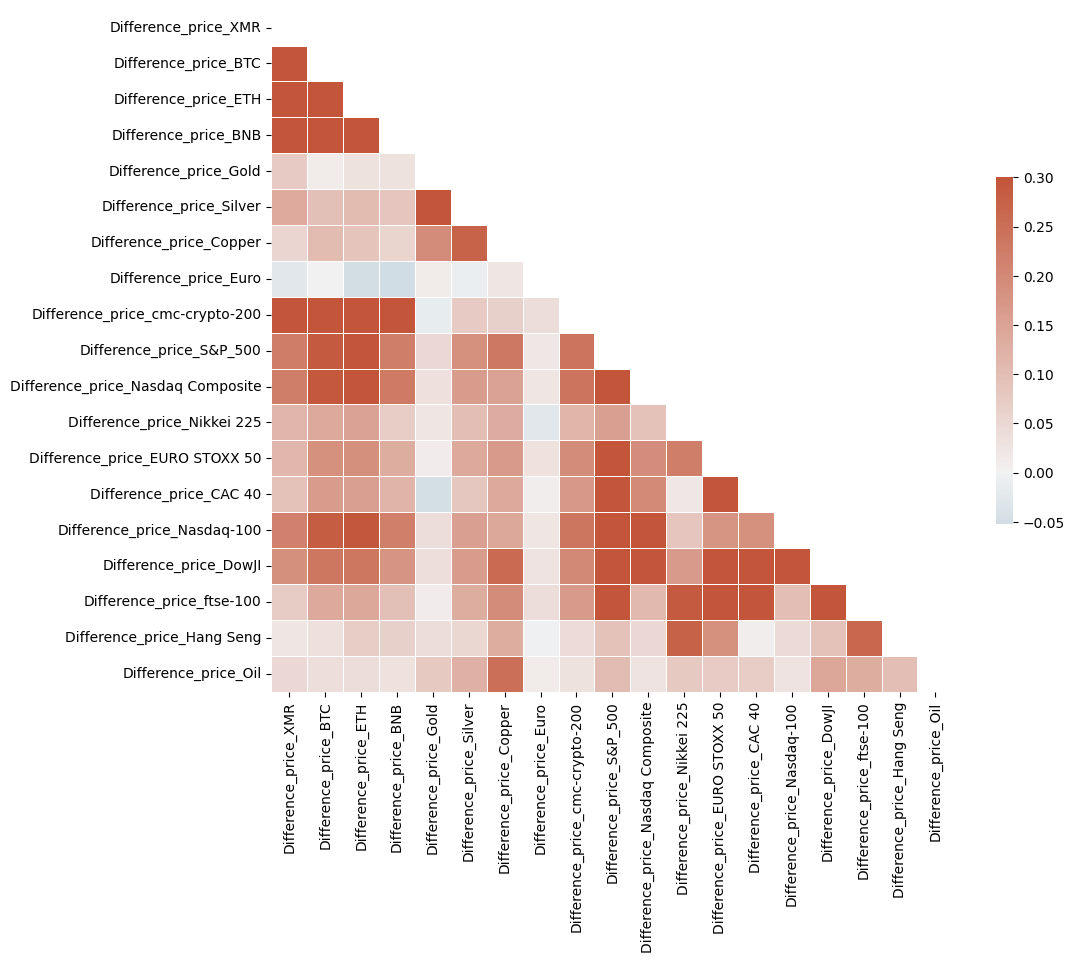

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


d = pd.DataFrame(data = diff_price , columns=l)

corr = d.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
XMR.reset_index(inplace=True)
all.reset_index(inplace=True)

In [ ]:
import plotly.express as px
fig = px.line_3d(XMR, x="Close", y="Date", z="Volume")
fig.show()

In [ ]:
fig = px.scatter_3d(all, x="Close", y="Date", z="Volume", size='Volume', color='Close')
fig.update_layout(scene_zaxis_type="log")
fig.show()